1. Veriyi okuma ve bağımlı-bağımsız değişken belirleme

In [5]:
import pandas as pd

file_path = "datasets/processed_thyroid_cancer_data.csv"
df = pd.read_csv(file_path)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  212691 non-null  int64  
 1   Family_History       212691 non-null  int64  
 2   Radiation_Exposure   212691 non-null  int64  
 3   Iodine_Deficiency    212691 non-null  int64  
 4   Smoking              212691 non-null  int64  
 5   Obesity              212691 non-null  int64  
 6   Diabetes             212691 non-null  int64  
 7   TSH_Level            212691 non-null  float64
 8   T3_Level             212691 non-null  float64
 9   T4_Level             212691 non-null  float64
 10  Nodule_Size          212691 non-null  float64
 11  Thyroid_Cancer_Risk  212691 non-null  int64  
 12  Gender_1             212691 non-null  bool   
 13  Country_1            212691 non-null  bool   
 14  Country_2            212691 non-null  bool   
 15  Country_3        

In [6]:
from sklearn.model_selection import train_test_split

# Hedef değişken (bağımlı değişken)
target_column = "Thyroid_Cancer_Risk"

# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop(columns=[target_column])
y = df[target_column] 

# Eğitim (%80) ve test (%20) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Eğitim Verisi:", X_train.shape, y_train.shape)
print("Test Verisi:", X_test.shape, y_test.shape)

Eğitim Verisi: (170152, 25) (170152,)
Test Verisi: (42539, 25) (42539,)


2. Veri Dengesizliği için SMOTE

In [7]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Sınıf ağırlıklarını hesaplayalım
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
weights_dict = dict(zip(np.unique(y_train), class_weights))

print("Sınıf Ağırlıkları:", weights_dict)

Sınıf Ağırlıkları: {0: 0.6541037173720832, 1: 0.9792357274401473, 2: 2.2222918789018626}


3. Naif Bayes Modeli Eğitimi

In [8]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

# İlk 10 tahmin
print("İlk 10 Tahmin Sonucu:", y_pred[:10])

İlk 10 Tahmin Sonucu: [2 0 0 0 0 0 0 0 2 2]


4. Karmaşıklık Matrisi ve Ölçüm Metrikleri

Karmaşıklık Matrisi:
 [[18608     9  3061]
 [12418     4  2058]
 [ 1853     0  4528]]
Doğruluk (Accuracy): 0.5440
Duyarlılık (Recall): 0.5440
Kesinlik (Precision): 0.4636
F1 Skoru: 0.4326


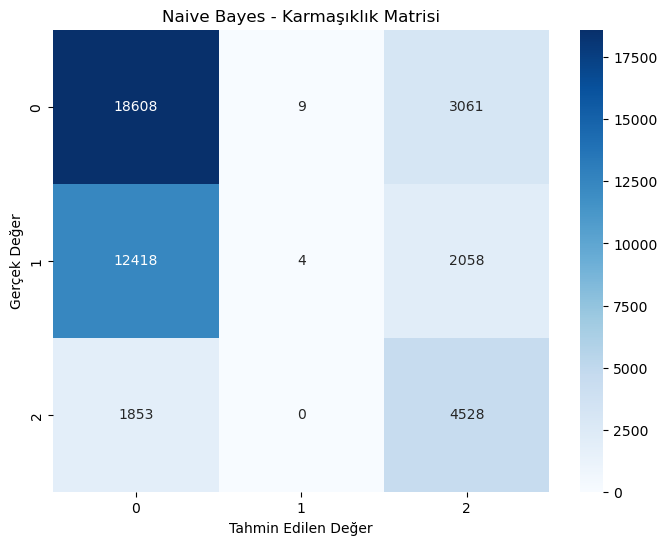

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
print("Karmaşıklık Matrisi:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy:.4f}")

recall = recall_score(y_test, y_pred, average="weighted") 
print(f"Duyarlılık (Recall): {recall:.4f}")

precision = precision_score(y_test, y_pred, average="weighted")
print(f"Kesinlik (Precision): {precision:.4f}")

f1 = f1_score(y_test, y_pred, average="weighted")
print(f"F1 Skoru: {f1:.4f}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Tahmin Edilen Değer")
plt.ylabel("Gerçek Değer")
plt.title("Naive Bayes - Karmaşıklık Matrisi")
plt.show()

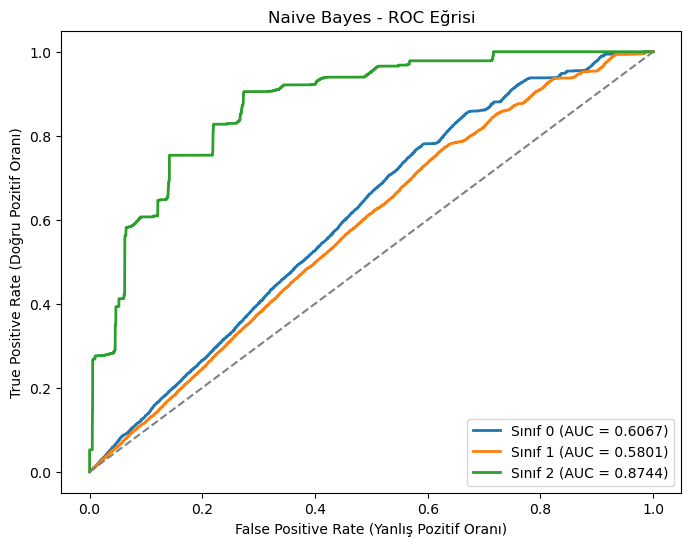

In [10]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Sınıfları one-hot encoding formatına çevirelim
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_prob = nb_model.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Sınıf {classes[i]} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")

# ROC Eğrisi grafiğini göster
plt.xlabel("False Positive Rate (Yanlış Pozitif Oranı)")
plt.ylabel("True Positive Rate (Doğru Pozitif Oranı)")
plt.title("Naive Bayes - ROC Eğrisi")
plt.legend(loc="lower right")
plt.show()